In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm import tqdm
from glob import glob

from sklearn.model_selection import KFold

In [2]:
configs = {
    'DATA_DIR': '../data/train', 
    'ROOT_DIR': '../',
    'fold': [0, 1, 2, 3, 4],
    'seed': 2021,
}
query = '*/*.jpg'

In [3]:
def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results.

    Args:
        seed (int): Number of the seed.
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = True

seed_everything(configs['seed'])

In [4]:
def read_image_file(input_path, query):
    file_paths = sorted(glob(os.path.join(input_path, query)))
    return file_paths

In [5]:
def get_class_lists(file_paths):
    class_lists = set([file_paths[i].split('/')[-2] for i in range(len(file_paths))])
    return list(class_lists)

In [6]:
def generate_dict(file_paths, classes):
    ids = []
    landmark_ids = []
    path = []
    for i in tqdm(range(len(file_paths))):
        try:
            landmark_ids.append(classes.index(file_paths[i].split('/')[-2]))
            ids.append(file_paths[i].split('/')[-1][:-4])
            path.append(file_paths[i])
        except:
            pass


    gen_dict = {'id': ids,
             'landmark_id': landmark_ids,
             'path': path}    
    return gen_dict

In [7]:
train_file_paths = read_image_file(configs['DATA_DIR'], query)
classes = get_class_lists(train_file_paths)

In [8]:
print(f"Total num of data: {len(train_file_paths)}")
print(f"Total num of classes: {len(classes)}")

Total num of data: 507930
Total num of classes: 2503


## train

In [9]:
train_df = generate_dict(train_file_paths, classes)

100%|██████████| 507930/507930 [00:08<00:00, 57500.20it/s]


In [11]:
train_df = pd.DataFrame(train_df)

In [13]:
print(f"number of classes : {len(train_df['landmark_id'].unique())}")

number of classes : 2503


In [16]:
kfold = KFold(n_splits=len(configs['fold']), random_state=configs['seed'], shuffle=True)
kfold.get_n_splits(train_df)

for i, (train_index, test_index) in enumerate(kfold.split(train_df)):
    train_df.loc[test_index, 'val_idx'] = i

In [17]:
for fold in configs['fold']:
    print(fold)
    train_df_fold = train_df.loc[train_df['val_idx'] != fold].reset_index(drop=True)
    test_df = train_df.loc[train_df['val_idx'] == fold].reset_index(drop=True)
    
    train_df_fold.to_csv(configs['ROOT_DIR'] + f'train_labels_{fold}.csv', index=False)
    test_df.to_csv(configs['ROOT_DIR'] + f'test_labels_{fold}.csv', index=False)
    
    print(f'train_df: {len(train_df_fold)}')
    print(f'test_df: {len(test_df)}')
train_df.to_csv(configs['ROOT_DIR'] + f'train_labels_fold.csv', index=False)

0
train_df: 406344
test_df: 101586
1
train_df: 406344
test_df: 101586
2
train_df: 406344
test_df: 101586
3
train_df: 406344
test_df: 101586
4
train_df: 406344
test_df: 101586


In [18]:
train = pd.read_csv('../train_labels_2.csv')
test = pd.read_csv('../test_labels_2.csv')

In [19]:
print(len(train['landmark_id'].unique()))
print(len(test['landmark_id'].unique()))

2503
2503


## EDA

In [21]:
print(len(train_df['landmark_id'].unique()))

2503


/home/dacon/anaconda3/envs/landmark/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='landmark_id', ylabel='Density'>

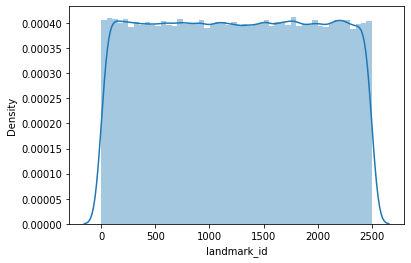

In [22]:
sns.distplot(train_df['landmark_id'])

/home/dacon/anaconda3/envs/landmark/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='landmark_id', ylabel='Density'>

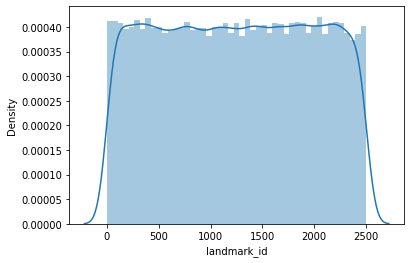

In [23]:
sns.distplot(test_df['landmark_id'])